#California Housing Prices Prediction
This project predicts California housing prices using Linear, Lasso, Ridge, and Random Forest Regression models.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Dataset

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("camnugent/california-housing-prices")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'california-housing-prices' dataset.
Path to dataset files: /kaggle/input/california-housing-prices


In [3]:
train_df = pd.read_csv('/content/sample_data/california_housing_train.csv')
test_df = pd.read_csv('/content/sample_data/california_housing_test.csv')

#Dataset Description

In [4]:
train_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [5]:
train_df.info()
train_df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


(17000, 9)

In [6]:
test_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0


In [7]:
test_df.info()
test_df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           3000 non-null   float64
 1   latitude            3000 non-null   float64
 2   housing_median_age  3000 non-null   float64
 3   total_rooms         3000 non-null   float64
 4   total_bedrooms      3000 non-null   float64
 5   population          3000 non-null   float64
 6   households          3000 non-null   float64
 7   median_income       3000 non-null   float64
 8   median_house_value  3000 non-null   float64
dtypes: float64(9)
memory usage: 211.1 KB


(3000, 9)

<Axes: >

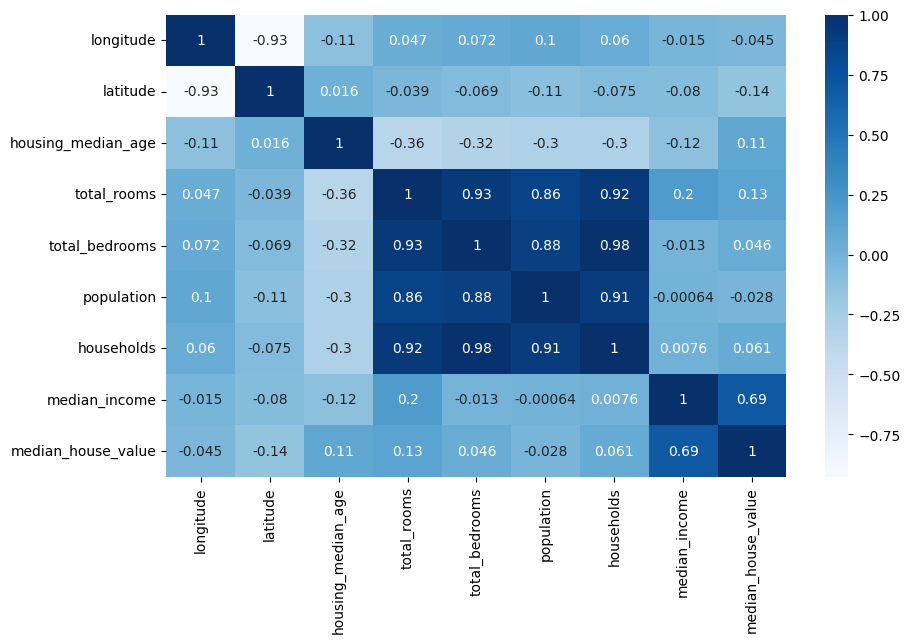

In [10]:
plt.figure(figsize=(10,6))
sns.heatmap(train_df.corr(numeric_only=True), annot=True, cmap='Blues')

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

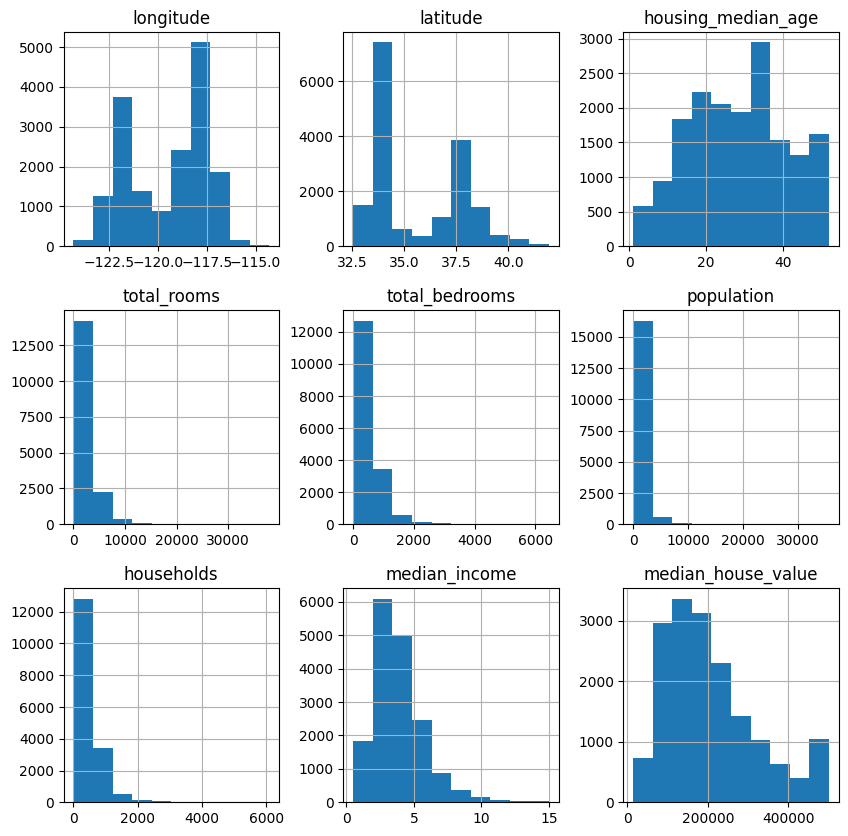

In [11]:
train_df.hist(figsize=(10,10))

Text(0.5, 1.0, 'Median House Value by Location')

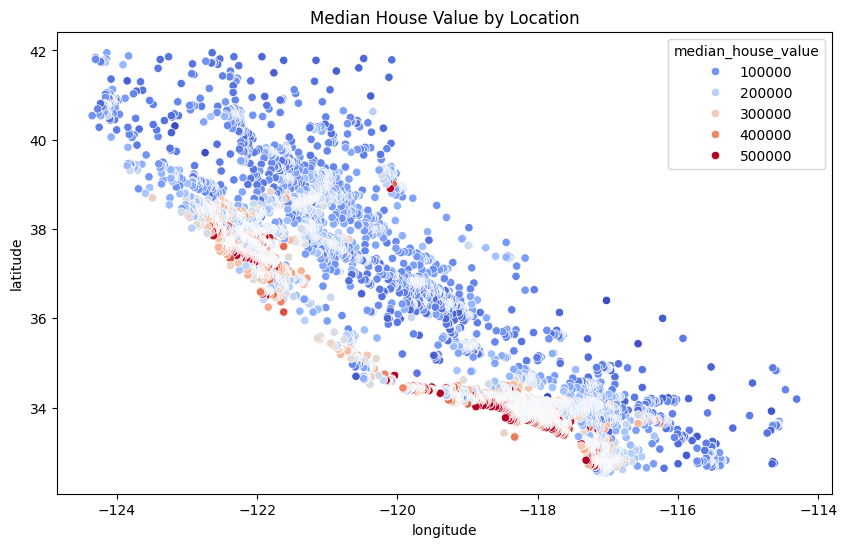

In [14]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='longitude', y='latitude', hue='median_house_value', data=train_df, palette='coolwarm')
plt.title('Median House Value by Location')

#Data Preparation

In [12]:
train_df['total_rooms'] = np.log(train_df['total_rooms'] + 1)
train_df['total_bedrooms'] = np.log(train_df['total_bedrooms'] + 1)
train_df['population'] = np.log(train_df['population'] + 1)
train_df['households'] = np.log(train_df['households'] + 1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

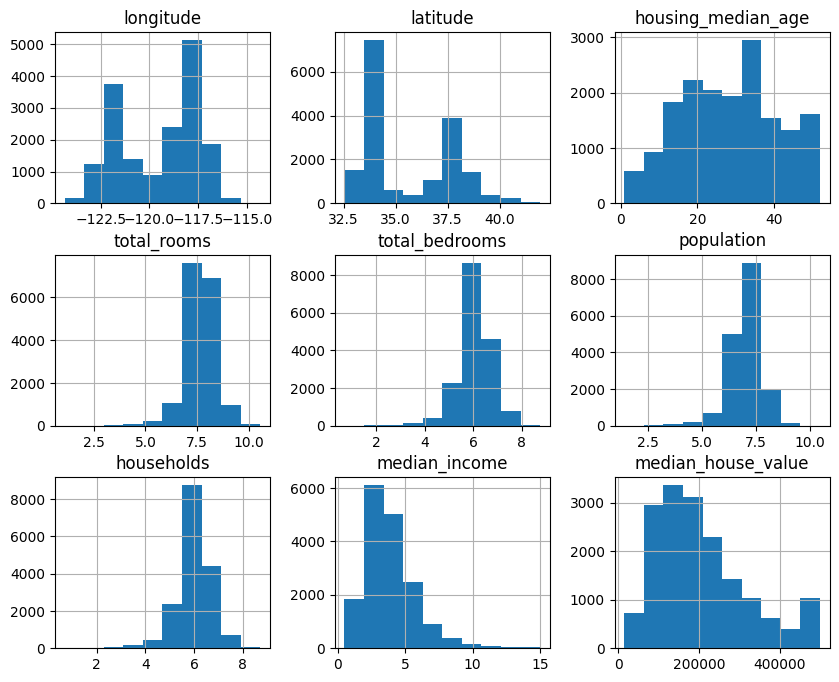

In [13]:
train_df.hist(figsize=(10,8))

In [15]:
train_df['bedroom_ratio'] = train_df['total_bedrooms'] / train_df['total_rooms']
train_df['household_rooms'] = train_df['total_rooms'] / train_df['households']

<Axes: >

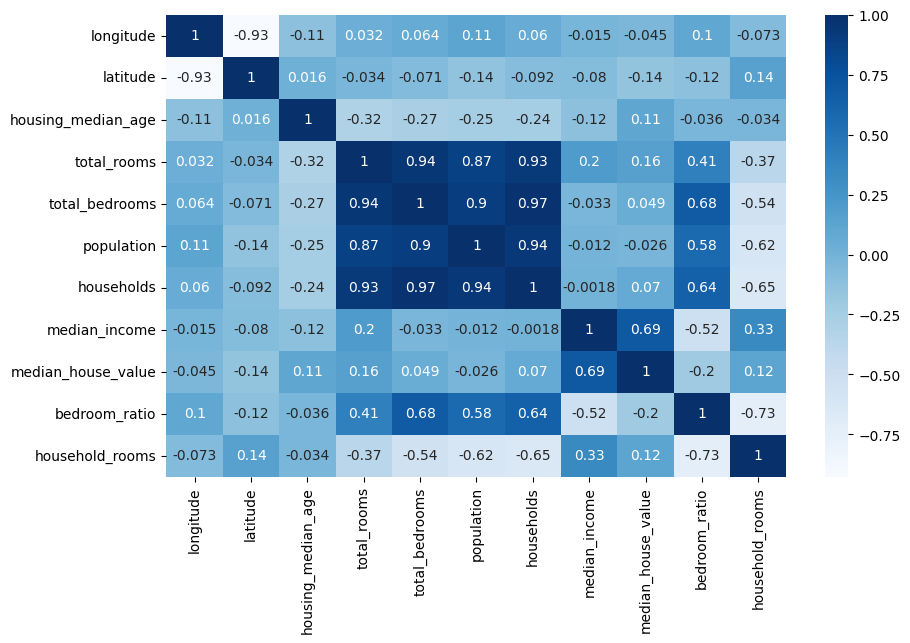

In [16]:
plt.figure(figsize=(10,6))
sns.heatmap(train_df.corr(numeric_only=True), annot=True, cmap='Blues')

In [17]:
X_train = train_df.drop('median_house_value', axis=1)
Y_train = train_df['median_house_value']

In [18]:
test_df['total_rooms'] = np.log(test_df['total_rooms'] + 1)
test_df['total_bedrooms'] = np.log(test_df['total_bedrooms'] + 1)
test_df['population'] = np.log(test_df['population'] + 1)
test_df['households'] = np.log(test_df['households'] + 1)

test_df['bedroom_ratio'] = test_df['total_bedrooms'] / test_df['total_rooms']
test_df['household_rooms'] = test_df['total_rooms'] / test_df['households']

In [19]:
X_test = test_df.drop('median_house_value', axis=1)
Y_test = test_df['median_house_value']

#Modelling

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
from sklearn.metrics import r2_score, mean_absolute_error, \
mean_absolute_percentage_error, mean_squared_error

In [21]:
LR = LinearRegression()
LR.fit(X_train, Y_train)
print(f"Training R2 score = {LR.score(X_train, Y_train)}")
print(f"Test R2 score = {LR.score(X_test, Y_test)}")

Training R2 score = 0.6709405504764346
Test R2 score = 0.6418764639764117


In [22]:
LR = Lasso()
LR.fit(X_train, Y_train)

print(f"Training R2 score = {LR.score(X_train, Y_train)}")
print(f"Test R2 score = {LR.score(X_test, Y_test)}")

Training R2 score = 0.6709349014489892
Test R2 score = 0.6418766981555064


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.228e+13, tolerance: 2.287e+10
  model = cd_fast.enet_coordinate_descent(


In [23]:
LR = Ridge()
LR.fit(X_train, Y_train)

print(f"Training R2 score = {LR.score(X_train, Y_train)}")
print(f"Test R2 score = {LR.score(X_test, Y_test)}")

Training R2 score = 0.6708364240481273
Test R2 score = 0.6417897181118315


#Evaluation

In [28]:
LR = LinearRegression()
LR.fit(X_train, Y_train)
Y_pred = LR.predict(X_test)

lasso = Lasso()
lasso.fit(X_train, Y_train)
Y_pred_lasso = lasso.predict(X_test)


ridge = Ridge()
ridge.fit(X_train, Y_train)
Y_pred_ridge = ridge.predict(X_test)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.228e+13, tolerance: 2.287e+10
  model = cd_fast.enet_coordinate_descent(


In [29]:
def get_metrics(p, y, y_pred):
    n = len(y)
    r2 = r2_score(y, y_pred)
    adjusted_r2 = 1 - (((1 - r2) * (n - 1)) / (n - p - 1))
    mae = mean_absolute_error(y, y_pred)
    mape = mean_absolute_percentage_error(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    return r2, adjusted_r2, mae, mape, mse

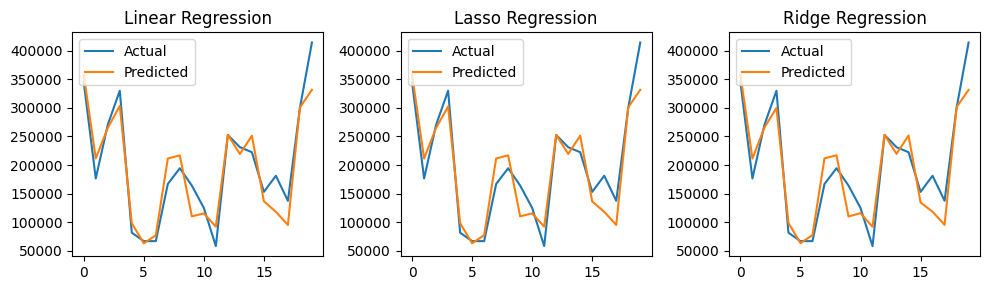

In [41]:
figure, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 3))

df = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred}).reset_index(drop=True)
axes[0].plot(df[:20]);
axes[0].set_title("Linear Regression");
axes[0].legend(["Actual", "Predicted"], loc="upper left")

df = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred_lasso}).reset_index(drop=True)
axes[1].plot(df[:20]);
axes[1].set_title("Lasso Regression");
axes[1].legend(["Actual", "Predicted"], loc="upper left")

df = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred_ridge}).reset_index(drop=True)
axes[2].plot(df[:20]);
axes[2].set_title("Ridge Regression");
axes[2].legend(["Actual", "Predicted"], loc="upper left")

plt.tight_layout()

In [31]:
p = X_train.shape[1]
pd.DataFrame([
              get_metrics(p, Y_test, Y_pred),
              get_metrics(p, Y_test, Y_pred_lasso),
              get_metrics(p, Y_test, Y_pred_ridge)
             ],
    columns=['R2', 'Adjusted R2', 'MAE', 'MAPE', 'MSE'],
    index=['Linear Regression', 'Lasso Regression', 'Ridge Regression'])

,R2,Adjusted R2,MAE,MAPE,MSE
Linear Regression,0.641876,0.640678,48403.577119,0.289519,4.581044e+09
Lasso Regression,0.641877,0.640679,48394.753034,0.289447,4.581041e+09
Ridge Regression,0.641790,0.640591,48363.899587,0.289170,4.582154e+09


#Random Forest Regressor

In [32]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train, Y_train)

RandomForestRegressor()

In [33]:
print(f"Training R2 score = {rf.score(X_train, Y_train)}")
print(f"Test R2 score = {rf.score(X_test, Y_test)}")

Training R2 score = 0.9738307507733067
Test R2 score = 0.7956894663010602
